 # <font color='green'> Data Visualization </font>

*In this notebook we compute graphs and tables to describe the data we have.*<br>
*We are answering our main question :*<br><br>
**<font color='red'>Do people preffer to go by train or by car to their destinations and the main factors affecting it</font>**

# <font color='red'>1.  Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

In [2]:
path1="./data_BlablaCar.csv"
path2="./data_trains_all_regions.csv"

data_blablacar=pd.read_csv(path1)
data_trains=pd.read_csv(path2)

## Car trips

In [3]:
data_blablacar['dep_date']=pd.to_datetime(data_blablacar['dep_date'], format='%d-%m-%y')
data_blablacar.head()

region dep_city                       dep_Adress dep_CC   dep_date  \
0     0.0    Paris                    TotalEnergies     FR 2023-01-20   
1     0.0    Paris  Gare routière RATP - Juvisy RER     FR 2023-01-20   
2     0.0    Paris                35 Rue de la Gare     FR 2023-01-20   
3     0.0    Paris            Massy Gare TGV, Massy     FR 2023-01-20   
4     0.0    Paris      24b Pl. de la Nation, Paris     FR 2023-01-20   

  dep_time  dep_time_slot  Distance_To_Dep arr_city  \
0  0:30:00            4.0         4.464425   Nantes   
1  7:40:00            1.0        18.586610   Nantes   
2  8:30:00            1.0        26.379103   Nantes   
3  8:50:00            1.0        15.993436   Nantes   
4  9:00:00            1.0         3.387712   Nantes   

                                       arr_Adress  ...  arr_date  arr_time  \
0                           Stade de la Beaujoire  ...  20-01-23   4:20:00   
1                      Gare de Rezé Pont-Rousseau  ...  20-01-23  11:40:00   
2  6 Route de la Chapelle-sur-Erdre, 44300 Nantes  ...  20-01-23  13:20:00   
3                               Le Cardo, Orvault  ...  20-01-23  12:30:00   
4                                Gare Sud, Nantes  ...  20-01-23  13:00:00   

  arr_time_slot  Distance_From_Arrival  price  currency distance_in_meters  \
0           4.0               4.721310   32.0       EUR           370348.0   
1           1.0               2.762161   25.0       EUR           380185.0   
2           2.0               4.422381   29.0       EUR           396878.0   
3           2.0               5.416233   27.0       EUR           360571.0   
4           2.0               0.876251   31.0       EUR           382781.0   

   duration  vehicle_make vehicle_model  
0   13800.0           NaN           NaN  
1   14400.0       RENAULT          CLIO  
2   17400.0      MERCEDES      CLASSE C  
3   13200.0       PEUGEOT          2008  
4   14400.0       PEUGEOT           807  

[5 rows x 21 columns]

*Here we have devided the time to 4 different slots as following :*<br>
`MORNING = {'start_time':5 ,'end_time':11 , 'slot_number': 1}`<br>
`MIDDAY = {'start_time':12 ,'end_time':15, 'slot_number': 2}`<br>
`AFTERNOON = {'start_time':16 ,'end_time':19, 'slot_number': 3}`<br>
`NIGHT = {'start_time':20 ,'end_time':4, 'slot_number': 4}`<br> <br>
*And devided the trips to 4 different regions as following :*<br>
`region_0 = ["Paris",  "Nantes", "Lyon", "Lille", "Marseille", "Reims"]`<br>
`region_1 = ["Bordeaux", "Toulouse", "Montpellier", "Marseille", "Nice", "Lyon"]`<br>
`region_2 = ["Nantes", "Brest", "Rennes", "Poitiers", "Paris"]`<br>
`region_4 = ["Nancy",  "Strasbourg", "Metz", "Reims", "Paris"]`

In [4]:
df_cars=data_blablacar[["price","distance_in_meters","duration"]].rename(columns={'distance_in_meters':'distance (meters)'})
df_cars.describe().loc[['mean','std','min','max']]

price  distance (meters)      duration
mean   21.184385       2.706000e+05  11121.835977
std    11.272636       1.429757e+05   5506.740118
min     2.000000       4.216900e+04   2400.000000
max   107.000000       1.284260e+06  47400.000000

In [5]:
cities=['Paris', 'Nantes', 'Lyon', 'Lille', 'Marseille', 'Reims',
       'Bordeaux', 'Toulouse', 'Montpellier', 'Nice', 'Brest',
       'Rennes', 'Poitiers', 'Nancy', 'Strasbourg', 'Metz']
main_cities=['Paris', 'Nantes', 'Lyon','Reims']

In [6]:
#get a table of blablacar trips from selected departure city
def dep_arr_trips(data_blablacar,city_dep):
    dep_arr_trips=data_blablacar[data_blablacar["dep_city"] == city_dep]
    dep_arr_trips=dep_arr_trips[["dep_city","dep_time_slot","dep_date","arr_city"]].value_counts().reset_index(name='count').sort_values("dep_date")
    return dep_arr_trips

In [7]:
#get a table of blablacar trips from selected arrival city
def arr_dep_trips(data_blablacar,city_arr):
    dep_arr_trips=data_blablacar[data_blablacar["arr_city"] == city_arr]
    dep_arr_trips=dep_arr_trips[["dep_city","dep_time_slot","dep_date","arr_city"]].value_counts().reset_index(name='count').sort_values("dep_date")
    return dep_arr_trips

## Train Trips

In [4]:
data_trains['dep_date']=pd.to_datetime(data_trains['dep_date'])
data_trains.head()

region dep_city   dep_date dep_time  dep_time_slot arr_city arr_time  \
0     0.0    Paris 2023-01-20     6:32            1.0   Nantes     8:54   
1     0.0    Paris 2023-01-20     6:48            1.0   Nantes     9:52   
2     0.0    Paris 2023-01-20     6:59            1.0   Nantes     9:52   
3     0.0    Paris 2023-01-20     7:06            1.0   Nantes    11:15   
4     0.0    Paris 2023-01-20     7:18            1.0   Nantes    11:02   

   arr_time_slot  duration  nb_changes     train_name_1 train_name_2  \
0            1.0    8520.0         0.0        TGV Inoui          NaN   
1            1.0   11040.0         1.0            Ouigo         SNCF   
2            1.0   10380.0         1.0        TGV Inoui         SNCF   
3            1.0   14940.0         1.0        TGV Inoui         SNCF   
4            1.0   13440.0         0.0  Ouigo Classique          NaN   

   standard_class_price first_class_price  
0                  50.0                54  
1                  37.0              58.4  
2                 113.0             134.4  
3                 104.0             146.5  
4                  19.0                 0

*Here we used the same divison of regions and time slot as before*<br>
*For further works we will focus on the lowest standard class price for the train trips*

In [9]:
data_trains["standard_class_price"]=data_trains["standard_class_price"].astype(float)
df_trains=data_trains[["standard_class_price","duration"]].rename(columns={'standard_class_price':'Price (2nd class)'})
df_trains.describe().loc[['mean','std','min','max']]

Price (2nd class)       duration
mean          60.996388   15432.561994
std           36.464205   11163.710247
min            5.000000    2340.000000
max          257.800000  190800.000000

# <font color='red'>2.  Availability</font>

*Now we are going to check the number of offerd trips for both cars and trains by regions and time slots.*<br>
*We will choose a main city in each region we have as follows:*<br>
**Region 0 : Paris** <br>
**Region 1: Lyon** <br>
**Region 2: Nantes** <br>
**Region 4: Reims**<br><br>
PS:We removed Region 3 because there was no much data on it

In [10]:
def plot_clustered_stacked(dfall, title, labels=None , H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe



# <font color='red'>Region 0 : ["Paris",  "Nantes", "Lyon", "Lille", "Marseille", "Reims"]

In [11]:
cities_0=['Lille','Lyon','Marseille','Nantes','Reims']
time_slots=["TS1", "TS2", "TS3", "TS4"]
array_c=[0,0,0,0,0]
array_t=[0,0,0,0,0]

# Departure

 >## Car trips

In [12]:
table_0=dep_arr_trips(data_blablacar,"Paris")

In [13]:
table_0=table_0.groupby(["arr_city","dep_time_slot"]).sum();
table_0=table_0.reset_index()
k=0
for i in cities_0:
    x=table_0[table_0['arr_city']==i]['count']
    array_c[k]=np.array(x)
    k=k+1 

>## Train Trips

In [14]:
df_0=data_trains[data_trains["dep_city"]=="Paris"]
df_0=df_0[["dep_city","dep_time_slot","arr_city"]]
df_0=df_0.groupby(["arr_city","dep_time_slot"]).count()
df_0=df_0.reset_index()
k=0
for i in cities_0:
    x=df_0[df_0['arr_city']==i]['dep_city']
    array_t[k]=np.array(x)
    k=k+1 

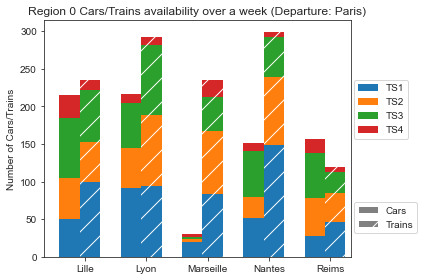

In [15]:
# create dataframes
df1 = pd.DataFrame(array_c,
                   index=cities_0,
                   columns=time_slots)

df2 = pd.DataFrame(array_t,
                   index=cities_0,
                   columns=time_slots)

# Then, just call :
plot_clustered_stacked([df1, df2],"Region 0 Cars/Trains availability over a week (Departure: Paris)",["Cars", "Trains"]);
plt.ylabel("Number of Cars/Trains")
plt.tight_layout()
plt.savefig("region0_departure_availiability.png", dpi=150)

# Arrival

In [16]:
array_c=[0,0,0,0,0]
array_t=[0,0,0,0,0]

 >## Car trips

In [17]:
table_0=arr_dep_trips(data_blablacar,"Paris")

In [18]:
table_0=table_0.groupby(["dep_city","dep_time_slot"]).sum();
table_0=table_0.reset_index()
k=0
for i in cities_0:
    x=table_0[table_0['dep_city']==i]['count']
    array_c[k]=np.array(x)
    k=k+1 

 >## Train trips

In [19]:
df_0=data_trains[data_trains["arr_city"]=="Paris"]
df_0=df_0[["dep_city","dep_time_slot","arr_city"]]
df_0
df_0=df_0.groupby(["dep_city","dep_time_slot"]).count()
df_0=df_0.reset_index()
k=0
for i in cities_0:
    x=df_0[df_0['dep_city']==i]['arr_city']
    array_t[k]=np.array(x)
    k=k+1 

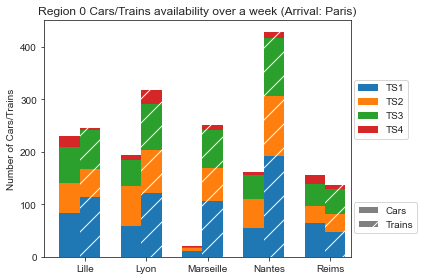

In [20]:
# create dataframes
df1 = pd.DataFrame(array_c,
                   index=cities_0,
                   columns=time_slots)

df2 = pd.DataFrame(array_t,
                   index=cities_0,
                   columns=time_slots)

# Then, just call :
plot_clustered_stacked([df1, df2],"Region 0 Cars/Trains availability over a week (Arrival: Paris)",["Cars", "Trains"]);
plt.ylabel("Number of Cars/Trains")
plt.tight_layout()
plt.savefig("region0_arrival_availiability.png", dpi=150)

# <font color='red'> Region 1 :["Bordeaux","Toulouse","Montpellier","Marseille","Nice","Lyon"]

In [21]:
cities_1=['Bordeaux','Toulouse','Marseille','Montpellier','Nice']
array_c=[0,0,0,0,0]
array_t=[0,0,0,0,0]

# Departure

 >## Car trips

In [22]:
table_1=dep_arr_trips(data_blablacar,"Lyon")

In [23]:
table_1=table_1.groupby(["arr_city","dep_time_slot"]).sum();
table_1=table_1.reset_index()
k=0
for i in cities_1:
    x=table_1[table_1['arr_city']==i]['count']
    array_c[k]=np.array(x)
    k=k+1 

>## Train Trips

In [24]:
df_1=data_trains[data_trains["dep_city"]=="Lyon"]
df_1=df_1[["dep_city","dep_time_slot","arr_city"]]
df_1=df_1.groupby(["arr_city","dep_time_slot"]).count()
df_1=df_1.reset_index()
k=0
for i in cities_1:
    x=df_1[df_1['arr_city']==i]['dep_city']
    array_t[k]=np.array(x)
    k=k+1 

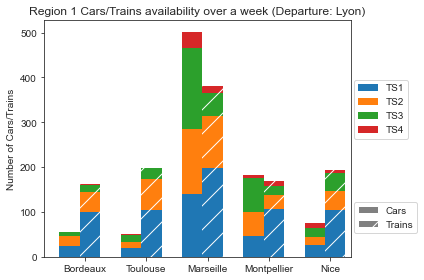

In [25]:
# create dataframes
df1_1 = pd.DataFrame(array_c,
                   index=cities_1,
                   columns=time_slots)

df2_1 = pd.DataFrame(array_t,
                   index=cities_1,
                   columns=time_slots)

# Then, just call :
plot_clustered_stacked([df1_1, df2_1],"Region 1 Cars/Trains availability over a week (Departure: Lyon)",["Cars", "Trains"]);
plt.ylabel("Number of Cars/Trains")
plt.tight_layout()
plt.savefig("region1_departure_availiability.png", dpi=150)

# Arrival

In [26]:
array_c=[0,0,0,0,0]
array_t=[0,0,0,0,0]

 >## Car trips

In [27]:
table_1=arr_dep_trips(data_blablacar,"Lyon")

In [28]:
table_1=table_1.groupby(["dep_city","dep_time_slot"]).sum();
table_1=table_1.reset_index()
k=0
for i in cities_1:
    x=table_1[table_1['dep_city']==i]['count']
    array_c[k]=np.array(x)
    k=k+1 

 >## Train trips

In [29]:
df_1=data_trains[data_trains["arr_city"]=="Lyon"]
df_1=df_1[["dep_city","dep_time_slot","arr_city"]]
df_1=df_1.groupby(["dep_city","dep_time_slot"]).count()
df_1=df_1.reset_index()
k=0
for i in cities_1:
    x=df_1[df_1['dep_city']==i]['arr_city']
    array_t[k]=np.array(x)
    k=k+1 

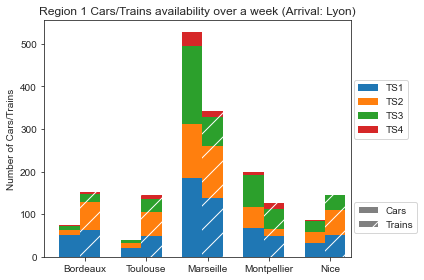

In [30]:
# create dataframes
df1_1 = pd.DataFrame(array_c,
                   index=cities_1,
                   columns=time_slots)

df2_1 = pd.DataFrame(array_t,
                   index=cities_1,
                   columns=time_slots)

# Then, just call :
plot_clustered_stacked([df1_1, df2_1],"Region 1 Cars/Trains availability over a week (Arrival: Lyon)",["Cars", "Trains"]);
plt.ylabel("Number of Cars/Trains")
plt.tight_layout()
plt.savefig("region1_arrival_availiability.png", dpi=150)

 # <font color='red'> Region 2 : ["Nantes", "Brest", "Rennes", "Poitiers", "Paris"]


In [31]:
cities_2=['Brest','Rennes','Poitiers','Paris']
array_c=[0,0,0,0]
array_t=[0,0,0,0]

# Departure

> ## Car trips

In [32]:
table_2=dep_arr_trips(data_blablacar,"Nantes")

In [33]:
table_2=table_2.groupby(["arr_city","dep_time_slot"]).sum();
table_2=table_2.reset_index()
k=0
for i in cities_2:
    x=table_2[table_2['arr_city']==i]['count']
    array_c[k]=np.array(x)
    k=k+1 

> ## Train Trips

In [34]:
df_2=data_trains[data_trains["dep_city"]=="Nantes"]
df_2=df_2[["dep_city","dep_time_slot","arr_city"]]
df_2=df_2.groupby(["arr_city","dep_time_slot"]).count()
df_2=df_2.reset_index()
k=0
for i in cities_2:
    x=df_2[df_2['arr_city']==i]['dep_city']
    array_t[k]=np.array(x)
    k=k+1 

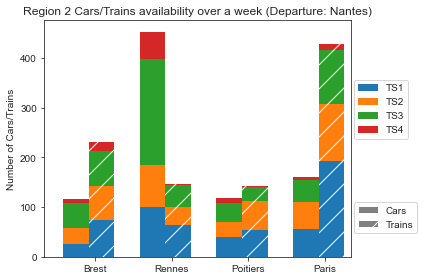

In [35]:
# create dataframes
df1_2 = pd.DataFrame(array_c,
                   index=cities_2,
                   columns=time_slots)

df2_2 = pd.DataFrame(array_t,
                   index=cities_2,
                   columns=time_slots)

# Then, just call :
plot_clustered_stacked([df1_2, df2_2],"Region 2 Cars/Trains availability over a week (Departure: Nantes)",["Cars", "Trains"]);
plt.ylabel("Number of Cars/Trains")
plt.tight_layout()
plt.savefig("region2_departure_availiability.png", dpi=150)

# Arrival

In [36]:
array_c=[0,0,0,0]
array_t=[0,0,0,0]

> ## Car trips

In [37]:
table_2=arr_dep_trips(data_blablacar,"Nantes")

In [38]:
table_2=table_2.groupby(["dep_city","dep_time_slot"]).sum();
table_2=table_2.reset_index()
k=0
for i in cities_2:
    x=table_2[table_2['dep_city']==i]['count']
    array_c[k]=np.array(x)
    k=k+1 

> ## Train Trips

In [39]:
df_2=data_trains[data_trains["arr_city"]=="Nantes"]
df_2=df_2[["dep_city","dep_time_slot","arr_city"]]
df_2=df_2.groupby(["dep_city","dep_time_slot"]).count()
df_2=df_2.reset_index()
k=0
for i in cities_2:
    x=df_2[df_2['dep_city']==i]['arr_city']
    array_t[k]=np.array(x)
    k=k+1 

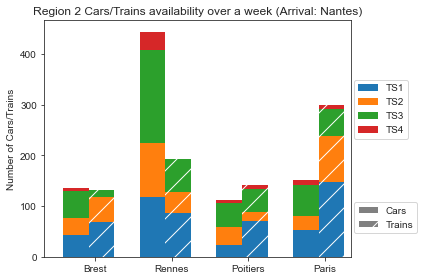

In [40]:
# create dataframes
df1_2 = pd.DataFrame(array_c,
                   index=cities_2,
                   columns=time_slots)

df2_2 = pd.DataFrame(array_t,
                   index=cities_2,
                   columns=time_slots)

# Then, just call :
plot_clustered_stacked([df1_2, df2_2],"Region 2 Cars/Trains availability over a week (Arrival: Nantes)",["Cars", "Trains"]);
plt.ylabel("Number of Cars/Trains")
plt.tight_layout()
plt.savefig("region2__arrival_availiability.png", dpi=150)

# <font color='red'>Region 4 : ["Nancy",  "Strasbourg", "Metz", "Reims", "Paris"]


In [41]:
cities_4=['Nancy','Strasbourg','Metz','Paris']
array_c=[0,0,0,0]
array_t=[0,0,0,0]

# Departure

 > ## Car trips

In [42]:
table_4=dep_arr_trips(data_blablacar,"Reims")

In [43]:
table_4=table_4.groupby(["arr_city","dep_time_slot"]).sum();
table_4=table_4.reset_index()
k=0
for i in cities_4:
    x=table_4[table_4['arr_city']==i]['count']
    array_c[k]=np.array(x)
    k=k+1 

>## Train Trips

In [44]:
df_4=data_trains[data_trains["dep_city"]=="Reims"]
df_4=df_4[["dep_city","dep_time_slot","arr_city"]]
df_4=df_4.groupby(["arr_city","dep_time_slot"]).count()
df_4=df_4.reset_index()
k=0
for i in cities_4:
    x=df_4[df_4['arr_city']==i]['dep_city']
    array_t[k]=np.array(x)
    k=k+1 

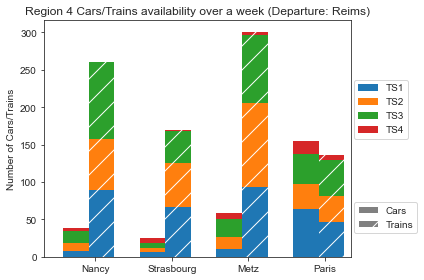

In [45]:
# create dataframes
df1_4 = pd.DataFrame(array_c,
                   index=cities_4,
                   columns=time_slots)

df2_4 = pd.DataFrame(array_t,
                   index=cities_4,
                   columns=time_slots)

# Then, just call :
plot_clustered_stacked([df1_4, df2_4],"Region 4 Cars/Trains availability over a week (Departure: Reims)",["Cars", "Trains"]);
plt.ylabel("Number of Cars/Trains")
plt.tight_layout()
plt.savefig("region4_departure_availiability.png", dpi=150)

# Arrival

In [46]:
array_c=[0,0,0,0]
array_t=[0,0,0,0]

>## Car Trips

In [47]:
table_4=arr_dep_trips(data_blablacar,"Reims")

In [48]:
table_4=table_4.groupby(["dep_city","dep_time_slot"]).sum();
table_4=table_4.reset_index()
k=0
for i in cities_4:
    x=table_4[table_4['dep_city']==i]['count']
    array_c[k]=np.array(x)
    k=k+1 

>## Train Trips

In [49]:
df_4=data_trains[data_trains["arr_city"]=="Reims"]
df_4=df_4[["dep_city","dep_time_slot","arr_city"]]
df_4=df_4.groupby(["dep_city","dep_time_slot"]).count()
df_4=df_4.reset_index()
k=0
for i in cities_4:
    x=df_4[df_4['dep_city']==i]['arr_city']
    array_t[k]=np.array(x)
    k=k+1 

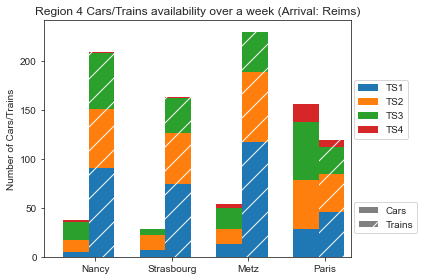

In [50]:
# create dataframes
df1_4 = pd.DataFrame(array_c,
                   index=cities_4,
                   columns=time_slots)

df2_4 = pd.DataFrame(array_t,
                   index=cities_4,
                   columns=time_slots)

# Then, just call :
plot_clustered_stacked([df1_4, df2_4],"Region 4 Cars/Trains availability over a week (Arrival: Reims)",["Cars", "Trains"]);
plt.ylabel("Number of Cars/Trains")
plt.tight_layout()
plt.savefig("region4_arrival_availiability.png", dpi=150)

## <font color='red'>Bonus

In [51]:
def dep_arr_trips1(data_blablacar,city_dep):
    dep_arr_trips=data_blablacar[data_blablacar["dep_city"] == city_dep]
    dep_arr_trips=dep_arr_trips[["dep_city","dep_time_slot","dep_date","arr_city","lat","lng"]].value_counts().reset_index(name='count').sort_values("dep_date")
    return dep_arr_trips

In [52]:
coor_dep=pd.read_csv("./raw_data_dep.csv")
coor_arr=pd.read_csv("./raw_data_arr.csv")
df_dep=pd.merge(data_blablacar,coor_dep,how="left",on=['dep_city'])
df_arr=pd.merge(data_blablacar,coor_arr,how="left",on=['arr_city'])
df_arr

region dep_city                       dep_Adress dep_CC   dep_date  \
0         0.0    Paris                    TotalEnergies     FR 2023-01-20   
1         0.0    Paris  Gare routière RATP - Juvisy RER     FR 2023-01-20   
2         0.0    Paris                35 Rue de la Gare     FR 2023-01-20   
3         0.0    Paris            Massy Gare TGV, Massy     FR 2023-01-20   
4         0.0    Paris      24b Pl. de la Nation, Paris     FR 2023-01-20   
...       ...      ...                              ...    ...        ...   
10188     4.0    Reims            E.Leclerc CHAMPFLEURY     FR 2023-01-27   
10189     4.0    Reims             Gare de Reims, Reims     FR 2023-01-28   
10190     4.0    Reims             Gare de Reims, Reims     FR 2023-01-28   
10191     4.0    Reims                            Verzy     FR 2023-01-28   
10192     4.0    Reims                            Verzy     FR 2023-01-28   

       dep_time  dep_time_slot  Distance_To_Dep arr_city  \
0       0:30:00            4.0         4.464425   Nantes   
1       7:40:00            1.0        18.586610   Nantes   
2       8:30:00            1.0        26.379103   Nantes   
3       8:50:00            1.0        15.993436   Nantes   
4       9:00:00            1.0         3.387712   Nantes   
...         ...            ...              ...      ...   
10188  20:00:00            4.0         6.668319     Metz   
10189   9:00:00            1.0         0.858044     Metz   
10190   9:00:00            1.0         0.858044     Metz   
10191  10:00:00            1.0        15.899404     Metz   
10192  10:00:00            1.0        15.899404     Metz   

                                           arr_Adress  ... arr_time_slot  \
0                               Stade de la Beaujoire  ...           4.0   
1                          Gare de Rezé Pont-Rousseau  ...           1.0   
2      6 Route de la Chapelle-sur-Erdre, 44300 Nantes  ...           2.0   
3                                   Le Cardo, Orvault  ...           2.0   
4                                    Gare Sud, Nantes  ...           2.0   
...                                               ...  ...           ...   
10188    10 Boulevard de Provence, 57070 Metz, France  ...           4.0   
10189    10 Boulevard de Provence, 57070 Metz, France  ...           1.0   
10190    10 Boulevard de Provence, 57070 Metz, France  ...           1.0   
10191             Rond point de l'échangeur d'Argancy  ...           1.0   
10192             Rond point de l'échangeur d'Argancy  ...           1.0   

      Distance_From_Arrival price  currency  distance_in_meters  duration  \
0                  4.721310  32.0       EUR            370348.0   13800.0   
1                  2.762161  25.0       EUR            380185.0   14400.0   
2                  4.422381  29.0       EUR            396878.0   17400.0   
3                  5.416233  27.0       EUR            360571.0   13200.0   
4                  0.876251  31.0       EUR            382781.0   14400.0   
...                     ...   ...       ...                 ...       ...   
10188              3.092882  12.0       EUR            190619.0    7200.0   
10189              3.092882  26.0       EUR            192097.0    7200.0   
10190              3.092882  26.0       EUR            192097.0    7200.0   
10191              8.720722  10.0       EUR            168393.0    6000.0   
10192              8.720722  10.0       EUR            168393.0    6000.0   

      vehicle_make  vehicle_model      lat     lng  
0              NaN            NaN  47.2181 -1.5528  
1          RENAULT           CLIO  47.2181 -1.5528  
2         MERCEDES       CLASSE C  47.2181 -1.5528  
3          PEUGEOT           2008  47.2181 -1.5528  
4          PEUGEOT            807  47.2181 -1.5528  
...            ...            ...      ...     ...  
10188      PEUGEOT            107  45.9406  6.1064  
10189          NaN            NaN  49.1203  6.1778  
10190          NaN            NaN  45.9406  6.

In [53]:
table0=dep_arr_trips1(df_arr,"Paris")
table1=table0[table0["arr_city"]=="Nantes"]
table_1=table1[table1["dep_time_slot"]==1]
table_2=table1[table1["dep_time_slot"]==2]
table_3=table1[table1["dep_time_slot"]==3]
table_4=table1[table1["dep_time_slot"]==4]

t1=table0[table0["dep_time_slot"]==1]
t1=t1.groupby(["arr_city"],as_index=False)["count"].sum()
table_new=table0[["dep_city","arr_city","lat","lng"]]
t1=pd.merge(t1,table_new,how="left",on=['arr_city'])
t1=t1.drop_duplicates()
t1.reset_index()

t2=table0[table0["dep_time_slot"]==2]
t2=t2.groupby(["arr_city"],as_index=False)["count"].sum()
t2=pd.merge(t2,table_new,how="left",on=['arr_city'])
t2=t2.drop_duplicates()
t2.reset_index()

t3=table0[table0["dep_time_slot"]==3]
t2=t3.groupby(["arr_city"],as_index=False)["count"].sum()
t3=pd.merge(t3,table_new,how="left",on=['arr_city'])
t3=t3.drop_duplicates()
t3.reset_index()

t4=table0[table0["dep_time_slot"]==4]
t4=t4.groupby(["arr_city"],as_index=False)["count"].sum()
t4=pd.merge(t4,table_new,how="left",on=['arr_city'])
t4=t4.drop_duplicates()
t4.reset_index()

index   arr_city  count dep_city      lat     lng
0      0      Lille     30    Paris  50.6278  3.0583
1     31       Lyon     12    Paris  45.7600  4.8400
2     59  Marseille      4    Paris  43.2964  5.3700
3     76     Nantes     10    Paris  47.2181 -1.5528
4    109      Reims     18    Paris  49.2628  4.0347

In [54]:
! pip install plotly

In [55]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()
paris_lon=[df_dep[df_dep["dep_city"]=="Paris"].lng[0]]
paris_lat=[df_dep[df_dep["dep_city"]=="Paris"].lat[0]]
fig.add_trace(go.Scattergeo(
    locations = ["France"],
    locationmode = 'country names',
    lon = paris_lon,
    lat = paris_lat,
    hoverinfo = 'text',
    text = df_dep[df_dep["dep_city"]=="Paris"].dep_city[0],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

flight_paths = []
for i in range(len(t1.values)):
    fig.add_trace(
        go.Scattergeo(
            locations = ["France"],
            locationmode = 'country names',
            lon = [paris_lon[0], t1['lng'].values[i]],
            lat = [paris_lat[0], t1['lat'].values[i]],
            mode = 'lines',
            line = dict(width = 4,color = 'red'),
            opacity = float(t1['count'].values[i]) / float(t1['count'].max()),
        )
    )

fig.update_layout(
    title_text = 'Trips',
    showlegend = False,
    geo = dict(
        center=dict(
            lat=47.0057,
            lon=3.7274
        ),
        scope = 'europe',
        projection_scale=6,
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig.show()

# <font color='red'>3.  Price Change

*We will now look at the price comparison between the lowest train and car prices over the week by region*

## For trains

In [56]:
# get the lowest price train per day and time slot between 2 cities
lowest_train=pd.DataFrame()
cities=['Paris', 'Nantes', 'Lyon', 'Lille', 'Marseille', 'Reims',
       'Bordeaux', 'Toulouse', 'Montpellier', 'Nice', 'Brest',
       'Rennes', 'Poitiers', 'Nancy', 'Strasbourg', 'Metz']
main_cities=['Paris', 'Nantes', 'Lyon','Reims']
for i in [1,2,3,4]:
    for j in main_cities:
        dt=data_trains
        dt1=dt[dt["dep_city"]==j]
        dt2=dt1[dt1["dep_time_slot"]==i]
        for k in cities:
            if(k!=j):
                dt3=dt2[dt2["arr_city"]==k]
                for l in list(range(9)):
                    date="2023-01-2"+str(l)
                    dt4=dt3[dt3["dep_date"]==date]
                    dt5=dt4[dt4["standard_class_price"]==dt4["standard_class_price"].min()]
                    lowest_train=lowest_train.append(dt5)
lowest_train=lowest_train.reset_index()                
lowest_train

index  region dep_city   dep_date dep_time  dep_time_slot    arr_city  \
0         4     0.0    Paris 2023-01-20     7:18            1.0      Nantes   
1        14     0.0    Paris 2023-01-21     7:20            1.0      Nantes   
2        57     0.0    Paris 2023-01-22     7:20            1.0      Nantes   
3       104     0.0    Paris 2023-01-23     7:18            1.0      Nantes   
4       136     0.0    Paris 2023-01-24     7:18            1.0      Nantes   
...     ...     ...      ...        ...      ...            ...         ...   
1153   7023     0.0    Reims 2023-01-27    20:42            4.0       Lille   
1154   9907     4.0    Reims 2023-01-23     4:55            4.0  Strasbourg   
1155   9382     4.0    Reims 2023-01-20    20:42            4.0        Metz   
1156   9459     4.0    Reims 2023-01-23     4:55            4.0        Metz   
1157   9604     4.0    Reims 2023-01-27    20:42            4.0        Metz   

     arr_time  arr_time_slot  duration  nb_changes     train_name_1  \
0       11:02            1.0   13440.0         0.0  Ouigo Classique   
1       11:02            1.0   13320.0         0.0  Ouigo Classique   
2       11:02            1.0   13320.0         0.0  Ouigo Classique   
3       11:02            1.0   13440.0         0.0  Ouigo Classique   
4       11:02            1.0   13440.0         0.0  Ouigo Classique   
...       ...            ...       ...         ...              ...   
1153     2:24            4.0   20520.0         2.0             SNCF   
1154     9:06            1.0   15060.0         2.0             SNCF   
1155     3:30            4.0   24480.0         3.0             SNCF   
1156    12:30            2.0   27300.0         2.0             SNCF   
1157     3:30            4.0   24480.0         3.0             SNCF   

      train_name_2  standard_class_price first_class_price  
0              NaN                 19.00                 0  
1              NaN                 22.00                 0  
2              NaN                 16.00                 0  
3              NaN                 13.00                 0  
4              NaN                 10.00                 0  
...            ...                   ...               ...  
1153     TGV Inoui                 46.89             48.89  
1154     TGV Inoui                 99.70             107.7  
1155     TGV Inoui                108.29            117.49  
1156  BlablacarBus                 44.69                 0  
1157     TGV Inoui                 99.69            105.09  

[1158 rows x 15 columns]

In [57]:
def price_t_array(cities):
    x0=np.array([])
    x1=np.array([])
    for i in cities:
        i=i.sort_values(["dep_date","dep_time_slot"])
        i=i.drop_duplicates(subset=["dep_time_slot","dep_date"])
        for j in list(range(8)):
            date="2023-01-2"+str(j)
            y=i[i["dep_date"]==date]
            pri=y["standard_class_price"]
            pri=np.array(pri)
            dur=y["duration"]
            dur=np.array(dur)
            while pri.size !=4:
                pri=np.append(pri,0)
            while dur.size !=4:
                dur=np.append(dur,1)    
            pri=np.resize(pri,(1,4))
            dur=np.resize(dur,(1,4))
            x0=np.append(x0,pri)
            x1=np.append(x1,dur)
    return x0,x1   

### Region 0

In [58]:
paris_t=lowest_train[lowest_train['dep_city']=="Paris"]
lille_t=paris_t[paris_t['arr_city']=="Lille"]
lyon_t=paris_t[paris_t['arr_city']=="Lyon"]
marseille_t=paris_t[paris_t['arr_city']=="Marseille"]
nantes_t=paris_t[paris_t['arr_city']=="Nantes"]
reims_t=paris_t[paris_t['arr_city']=="Reims"]

cities0=[lille_t,lyon_t,marseille_t,nantes_t,reims_t]

In [59]:
x=price_t_array(cities0)[0]
price_t_0=np.split(x,5)

### Region 1

In [60]:
Lyon_t=lowest_train[lowest_train['dep_city']=="Lyon"]
Bordeaux_t=Lyon_t[Lyon_t['arr_city']=="Bordeaux"]
Toulouse_t=Lyon_t[Lyon_t['arr_city']=="Toulouse"]
Montpellier_t=Lyon_t[Lyon_t['arr_city']=="Montpellier"]
Marseille_t=Lyon_t[Lyon_t['arr_city']=="Marseille"]
Nice_t=Lyon_t[Lyon_t['arr_city']=="Nice"]


cities1=[Bordeaux_t,Toulouse_t,Montpellier_t,Marseille_t,Nice_t]

In [61]:
x=price_t_array(cities1)[0]
price_t_1=np.split(x,5)

### Region 2

In [62]:
Nantes_t=lowest_train[lowest_train['dep_city']=="Nantes"]
Brest_t=Nantes_t[Nantes_t['arr_city']=="Brest"]
Rennes_t=Nantes_t[Nantes_t['arr_city']=="Rennes"]
Poitiers_t=Nantes_t[Nantes_t['arr_city']=="Poitiers"]
Paris_t=Nantes_t[Nantes_t['arr_city']=="Paris"]


cities2=[Brest_t,Rennes_t,Poitiers_t,Paris_t]

In [63]:
x=price_t_array(cities2)[0]
price_t_2=np.split(x,4)

### Region 4

In [64]:
Reims_t=lowest_train[lowest_train['dep_city']=="Reims"]
Nancy_t=Reims_t[Reims_t['arr_city']=="Nancy"]
Strasbourg_t=Reims_t[Reims_t['arr_city']=="Strasbourg"]
Metz_t=Reims_t[Reims_t['arr_city']=="Metz"]
Paris_t=Reims_t[Reims_t['arr_city']=="Paris"]


cities4=[Nancy_t,Strasbourg_t,Metz_t,Paris_t]

In [65]:
x=price_t_array(cities4)[0]
price_t_4=np.split(x,4)

### Total price array for Trains

In [66]:
price_t=[price_t_0,price_t_1,price_t_2,price_t_4]

## For Cars

In [67]:
# get the lowest price car per day and time slot between 2 cities
lowest_car=pd.DataFrame()
cities=['Paris', 'Nantes', 'Lyon', 'Lille', 'Marseille', 'Reims',
       'Bordeaux', 'Toulouse', 'Montpellier', 'Nice', 'Brest',
       'Rennes', 'Poitiers', 'Nancy', 'Strasbourg', 'Metz']
main_cities=['Paris', 'Nantes', 'Lyon','Reims']
for i in [1,2,3,4]:
    for j in main_cities:
        dt=data_blablacar
        dt1=dt[dt["dep_city"]==j]
        dt2=dt1[dt1["dep_time_slot"]==i]
        for k in cities:
            if(k!=j):
                dt3=dt2[dt2["arr_city"]==k]
                for l in list(range(9)):
                    date="2023-01-2"+str(l)
                    dt4=dt3[dt3["dep_date"]==date]
                    dt5=dt4[dt4["price"]==dt4["price"].min()]
                    lowest_car=lowest_car.append(dt5)
lowest_car=lowest_car.reset_index()                
lowest_car

index  region dep_city                                 dep_Adress dep_CC  \
0        8     0.0    Paris  14 Rue Jean Bleuzen, 92170 Vanves, France     FR   
1       12     0.0    Paris                          Avia, Saint-Mandé     FR   
2       53     0.0    Paris                                Rambouillet     FR   
3       65     0.0    Paris          Gare de Sainte Geneviève des Bois     FR   
4      100     0.0    Paris              8 Rue Sainte-Anne, Versailles     FR   
..     ...     ...      ...                                        ...    ...   
862   9886     4.0    Reims                                       D944     FR   
863   9887     4.0    Reims                                       D944     FR   
864   9893     4.0    Reims     Station-service E. Leclerc Champfleury     FR   
865   9898     4.0    Reims           4 Imp. Léo Lagrange, 51100 Reims     FR   
866   9903     4.0    Reims                      E.Leclerc CHAMPFLEURY     FR   

      dep_date  dep_time  dep_time_slot  Distance_To_Dep arr_city  ...  \
0   2023-01-20  10:00:00            1.0         5.956832   Nantes  ...   
1   2023-01-20  11:50:00            1.0         4.811420   Nantes  ...   
2   2023-01-21   8:30:00            1.0        44.937901   Nantes  ...   
3   2023-01-22   9:30:00            1.0        22.798503   Nantes  ...   
4   2023-01-23  10:00:00            1.0        17.565039   Nantes  ...   
..         ...       ...            ...              ...      ...  ...   
862 2023-01-23   1:40:00            4.0         4.497368     Metz  ...   
863 2023-01-23   3:40:35            4.0         4.497368     Metz  ...   
864 2023-01-24  20:10:00            4.0         6.782098     Metz  ...   
865 2023-01-26  21:20:00            4.0         2.055599     Metz  ...   
866 2023-01-27  20:00:00            4.0         6.668319     Metz  ...   

     arr_date  arr_time arr_time_slot Distance_From_Arrival  price  currency  \
0    20-01-23  13:50:00           2.0             44.128221   23.0       EUR   
1    20-01-23  15:50:00           2.0              7.918316   23.0       EUR   
2    21-01-23  12:20:00           2.0             10.014866   20.0       EUR   
3    22-01-23  13:20:00           2.0              5.863545   22.0       EUR   
4    23-01-23  13:40:00           2.0             32.706460   21.0       EUR   
..        ...       ...           ...                   ...    ...       ...   
862  23-01-23   5:30:00           1.0              3.092882   13.0       EUR   
863  23-01-23   7:30:35           1.0              3.092882   13.0       EUR   
864  24-01-23  22:10:00           4.0              5.185729   10.0       EUR   
865  26-01-23  23:30:00           4.0              1.165539   16.0       EUR   
866  27-01-23  22:00:00           4.0              3.092882   12.0       EUR   

     distance_in_meters duration  vehicle_make  vehicle_model  
0              370500.0  13800.0           NaN            NaN  
1              389064.0  14400.0       CITROEN     C3 PICASSO  
2              334404.0  13800.0       RENAULT      SCENIC II  
3              368037.0  13800.0           NaN            NaN  
4              335445.0  13200.0            DS      VERSION 4  
..                  ...      ...           ...            ...  
862            276703.0  13800.0       RENAULT         KADJAR  
863            276703.0  13800.0       RENAULT         KADJAR  
864            192479.0   7200.0       CITROEN             C3  
865            190382.0   7800.0          SEAT          ALTEA  
866            190619.0   7200.0       PEUGEOT            107  

[867 rows x 22 columns]

In [68]:
def price_c_array(cities):
    x0=np.array([])
    x1=np.array([])
    for i in cities:
        i=i.sort_values(["dep_date","dep_time_slot"])
        i=i.drop_duplicates(subset=["dep_time_slot","dep_date"])
        for j in list(range(8)):
            date="2023-01-2"+str(j)
            y=i[i["dep_date"]==date]
            pri=y["price"]
            pri=np.array(pri)
            dur=y["duration"]
            dur=np.array(dur)
            while pri.size !=4:
                pri=np.append(pri,0)
            while dur.size !=4:
                dur=np.append(dur,1)    
            pri=np.resize(pri,(1,4))
            dur=np.resize(dur,(1,4))
            x0=np.append(x0,pri)
            x1=np.append(x1,dur)
    return [x0,x1]

## Region 0

In [69]:
paris_c=lowest_car[lowest_car['dep_city']=="Paris"]
lille_c=paris_c[paris_c['arr_city']=="Lille"]
lyon_c=paris_c[paris_c['arr_city']=="Lyon"]
marseille_c=paris_c[paris_c['arr_city']=="Marseille"]
nantes_c=paris_c[paris_c['arr_city']=="Nantes"]
reims_c=paris_c[paris_c['arr_city']=="Reims"]

cities_0=[lille_c,lyon_c,marseille_c,nantes_c,reims_c]

In [70]:
x=price_c_array(cities_0)[0]
price_c_0=np.split(x,5)

## Region 1

In [71]:
Lyon_t=lowest_car[lowest_car['dep_city']=="Lyon"]
Bordeaux_t=Lyon_t[Lyon_t['arr_city']=="Bordeaux"]
Toulouse_t=Lyon_t[Lyon_t['arr_city']=="Toulouse"]
Montpellier_t=Lyon_t[Lyon_t['arr_city']=="Montpellier"]
Marseille_t=Lyon_t[Lyon_t['arr_city']=="Marseille"]
Nice_t=Lyon_t[Lyon_t['arr_city']=="Nice"]


cities_1=[Bordeaux_t,Toulouse_t,Montpellier_t,Marseille_t,Nice_t]

In [72]:
x=price_c_array(cities_1)[0]
price_c_1=np.split(x,5)

## Region 2

In [73]:
Nantes_t=lowest_car[lowest_car['dep_city']=="Nantes"]
Brest_t=Nantes_t[Nantes_t['arr_city']=="Brest"]
Rennes_t=Nantes_t[Nantes_t['arr_city']=="Rennes"]
Poitiers_t=Nantes_t[Nantes_t['arr_city']=="Poitiers"]
Paris_t=Nantes_t[Nantes_t['arr_city']=="Paris"]


cities_2=[Brest_t,Rennes_t,Poitiers_t,Paris_t]

In [74]:
x=price_c_array(cities_2)[0]
price_c_2=np.split(x,4)

## Region 4

In [75]:
Reims_t=lowest_car[lowest_car['dep_city']=="Reims"]
Nancy_t=Reims_t[Reims_t['arr_city']=="Nancy"]
Strasbourg_t=Reims_t[Reims_t['arr_city']=="Strasbourg"]
Metz_t=Reims_t[Reims_t['arr_city']=="Metz"]
Paris_t=Reims_t[Reims_t['arr_city']=="Paris"]


cities_4=[Nancy_t,Strasbourg_t,Metz_t,Paris_t]

In [76]:
x=price_c_array(cities_4)[0]
price_c_4=np.split(x,4)

### Total price array for Cars

In [77]:
price_c=[price_c_0,price_c_1,price_c_2,price_c_4]

## Plots

In [78]:
len0=len(cities_0)
len1=len(cities_1)
len2=len(cities_2)
len4=len(cities_4)
length_city=[len0,len1,len2,len4]
color=['r','g','b','m','y']

### Region 0

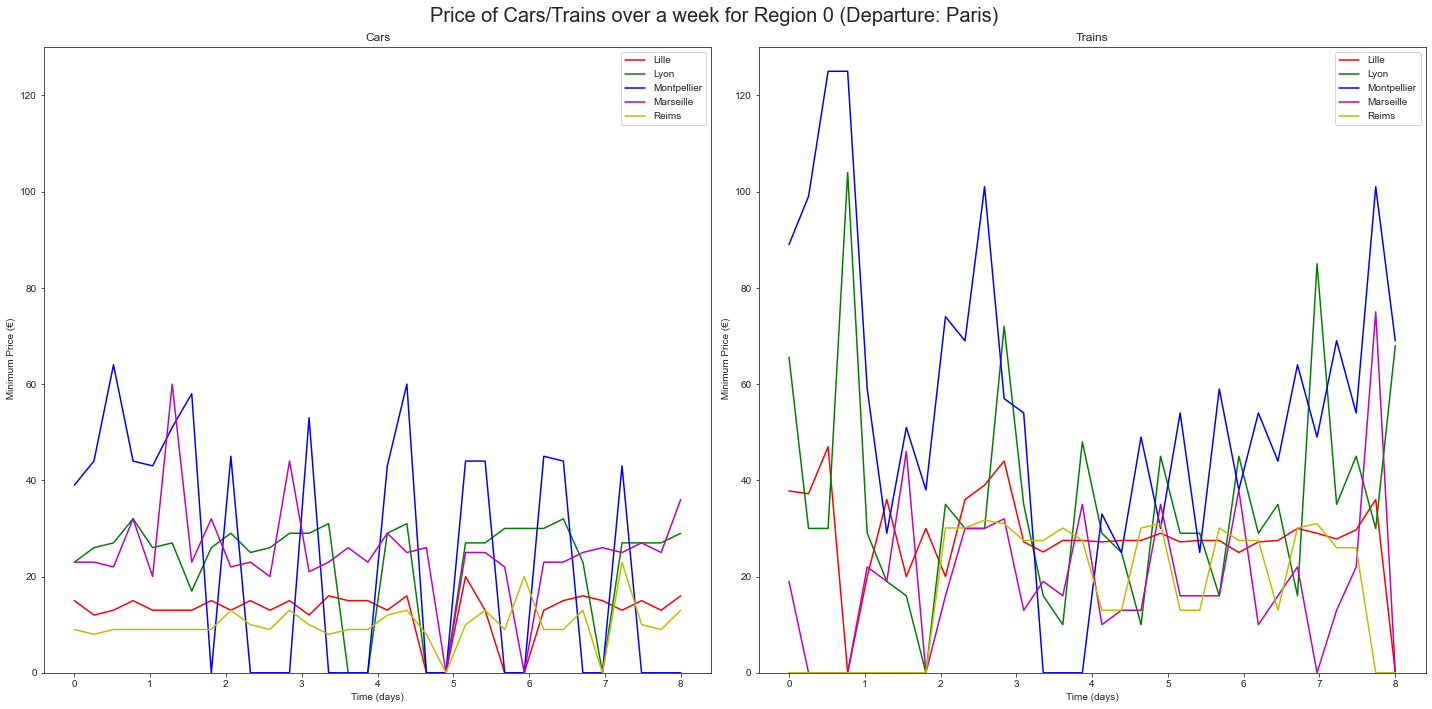

In [79]:
fig = plt.figure(figsize=(20,10))
X=np.linspace(0, 8, 32)
j=0
city=['Lille','Lyon','Montpellier','Marseille','Reims']
sub1=plt.subplot(1,2,1)
sub2=plt.subplot(1,2,2)
for i in range(length_city[0]):
    sub1.plot(X, price_c[0][i],str(color[j]),label=str(city[i]))
    sub2.plot(X, price_t[0][i],str(color[j]),label=str(city[i]))
    j=j+1
sub1.legend()
sub2.legend()
sub1.set_ylim([0,130])
sub2.set_ylim([0,130])
sub1.set_xlabel("Time (days)")
sub2.set_xlabel("Time (days)")
sub1.set_ylabel(" Minimum Price (€)")
sub2.set_ylabel(" Minimum Price (€)")
sub1.set_title("Cars")
sub2.set_title("Trains")
fig.suptitle("Price of Cars/Trains over a week for Region 0 (Departure: Paris) ",fontsize = 20)
plt.tight_layout()
plt.savefig("price0.png", dpi=150)

### Region 1

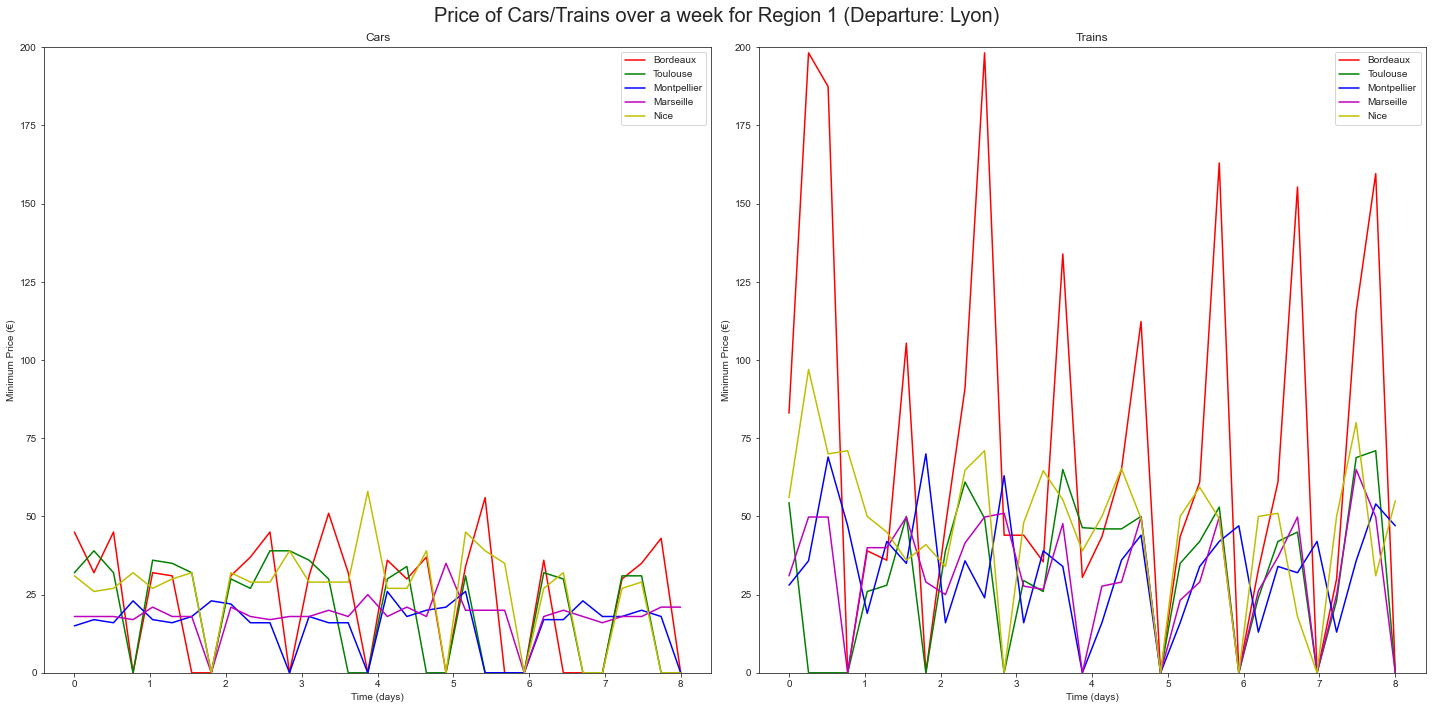

In [80]:
fig = plt.figure(figsize=(20,10))
X=np.linspace(0, 8, 32)
j=0
city=['Bordeaux','Toulouse','Montpellier','Marseille','Nice']
sub1=plt.subplot(1,2,1)
sub2=plt.subplot(1,2,2)
for i in range(length_city[1]):
    sub1.plot(X, price_c[1][i],str(color[j]),label=str(city[i]))
    sub2.plot(X, price_t[1][i],str(color[j]),label=str(city[i]))
    j=j+1
sub1.legend()
sub2.legend()
sub1.set_ylim([0,200])
sub2.set_ylim([0,200])
sub1.set_xlabel("Time (days)")
sub2.set_xlabel("Time (days)")
sub1.set_ylabel("Minimum Price (€)")
sub2.set_ylabel("Minimum Price (€)")
sub1.set_title("Cars")
sub2.set_title("Trains")
fig.suptitle("Price of Cars/Trains over a week for Region 1 (Departure: Lyon)",fontsize = 20)
plt.tight_layout()
plt.savefig("price1.png", dpi=150)

### Region 2

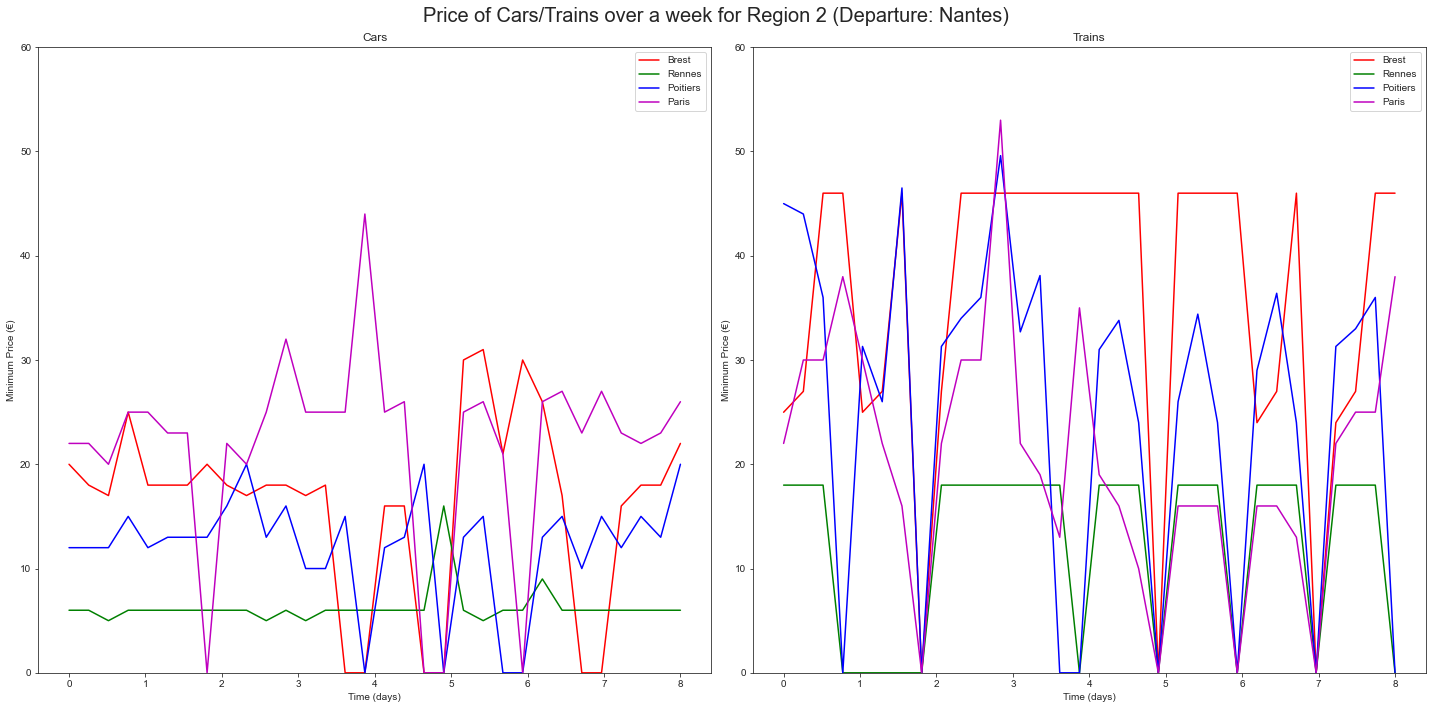

In [81]:
fig = plt.figure(figsize=(20,10))
X=np.linspace(0, 8, 32)
j=0
city=['Brest','Rennes','Poitiers','Paris']
sub1=plt.subplot(1,2,1)
sub2=plt.subplot(1,2,2)
for i in range(length_city[2]):
    sub1.plot(X, price_c[2][i],str(color[j]),label=str(city[i]))
    sub2.plot(X, price_t[2][i],str(color[j]),label=str(city[i]))
    j=j+1
sub1.legend()
sub2.legend()
sub1.set_ylim([0,60])
sub2.set_ylim([0,60])
sub1.set_xlabel("Time (days)")
sub2.set_xlabel("Time (days)")
sub1.set_ylabel("Minimum Price (€)")
sub2.set_ylabel("Minimum Price (€)")
sub1.set_title("Cars")
sub2.set_title("Trains")
fig.suptitle("Price of Cars/Trains over a week for Region 2 (Departure: Nantes)",fontsize = 20)
plt.tight_layout()
plt.savefig("price2.png", dpi=150)

### Region 4

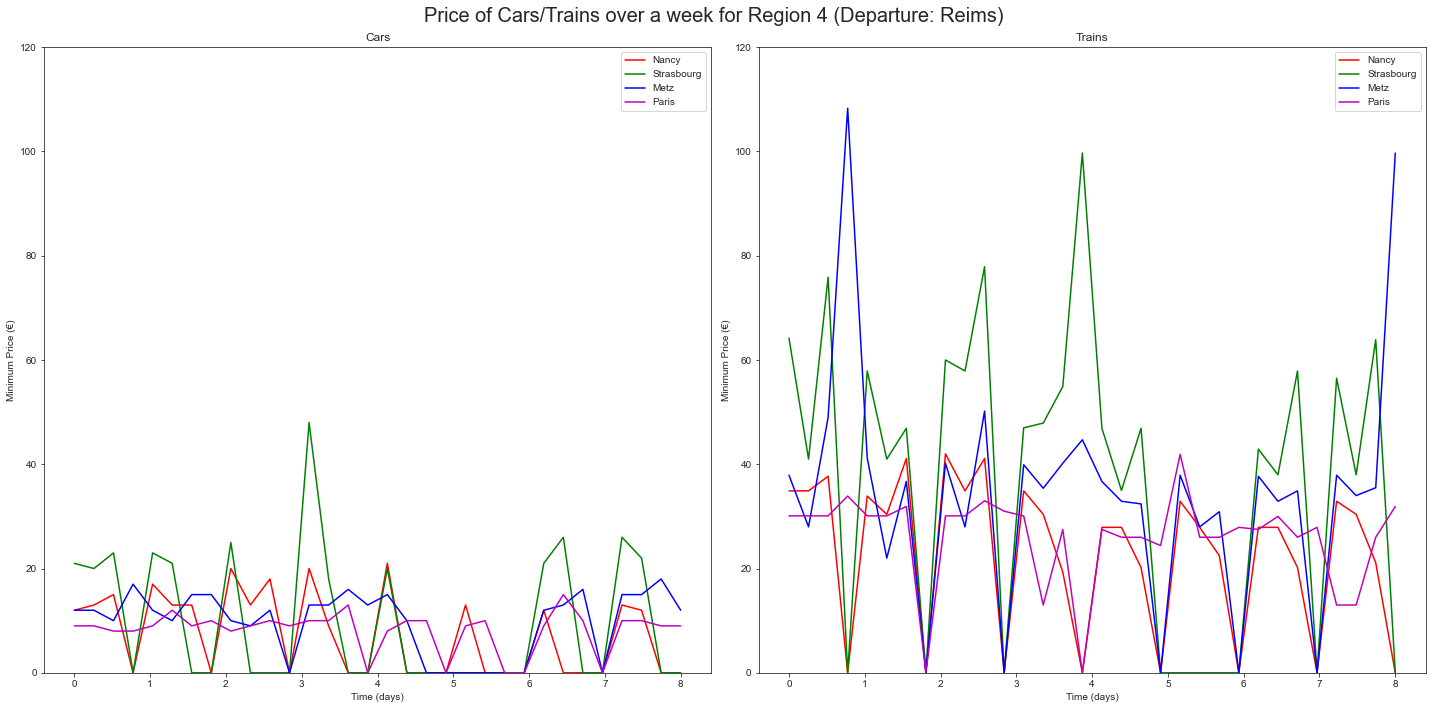

In [82]:
fig = plt.figure(figsize=(20,10))
X=np.linspace(0, 8, 32)
j=0
city=['Nancy','Strasbourg','Metz','Paris']
sub1=plt.subplot(1,2,1)
sub2=plt.subplot(1,2,2)
for i in range(length_city[3]):
    sub1.plot(X, price_c[3][i],str(color[j]),label=str(city[i]))
    sub2.plot(X, price_t[3][i],str(color[j]),label=str(city[i]))
    j=j+1
sub1.legend()
sub2.legend()
sub1.set_ylim([0,120])
sub2.set_ylim([0,120])
sub1.set_xlabel("Time (days)")
sub2.set_xlabel("Time (days)")
sub1.set_ylabel("Minimum Price (€)")
sub2.set_ylabel("Minimum Price (€)")
sub1.set_title("Cars")
sub2.set_title("Trains")
fig.suptitle("Price of Cars/Trains over a week for Region 4 (Departure: Reims) ",fontsize = 20)
plt.tight_layout()
plt.savefig("price4.png", dpi=150)

## Plots (avg)

### For cars

In [83]:
y=price_c_array(cities_0)[1]
dur_c_0=np.split(y,5)
y=price_c_array(cities_1)[1]
dur_c_1=np.split(y,5)
y=price_c_array(cities_2)[1]
dur_c_2=np.split(y,4)
y=price_c_array(cities_4)[1]
dur_c_4=np.split(y,4)
dur_c=[dur_c_0,dur_c_1,dur_c_2,dur_c_4]
dur_c[0]=np.mean(dur_c[0],axis=0)
dur_c[1]=np.mean(dur_c[1],axis=0)
dur_c[2]=np.mean(dur_c[2],axis=0)
dur_c[3]=np.mean(dur_c[3],axis=0)
b=np.array(3600)
dur_c=dur_c/b

### For trains

In [84]:
y=price_t_array(cities0)[1]
dur_t_0=np.split(y,5)
y=price_t_array(cities1)[1]
dur_t_1=np.split(y,5)
y=price_t_array(cities2)[1]
dur_t_2=np.split(y,4)
y=price_t_array(cities4)[1]
dur_t_4=np.split(y,4)
dur_t=[dur_t_0,dur_t_1,dur_t_2,dur_t_4]
dur_t[0]=np.mean(dur_t[0],axis=0)
dur_t[1]=np.mean(dur_t[1],axis=0)
dur_t[2]=np.mean(dur_t[2],axis=0)
dur_t[3]=np.mean(dur_t[3],axis=0)
dur_t=dur_t/b

In [85]:
dur_t

array([[4.60338889e+00, 2.28344444e+00, 1.82344444e+00, 1.14350000e+00,
        2.21672222e+00, 2.75338889e+00, 2.70672222e+00, 2.04350000e+00,
        3.04000000e+00, 4.16000000e+00, 3.30666667e+00, 1.33533333e+01,
        1.20533333e+01, 1.16667222e+01, 2.52338889e+00, 1.04067222e+01,
        3.40666667e+00, 2.67000000e+00, 3.18666667e+00, 1.21900000e+01,
        3.40666667e+00, 2.67000000e+00, 3.21666667e+00, 1.21900000e+01,
        1.20866667e+01, 3.72666667e+00, 3.25000000e+00, 1.16733889e+01,
        1.19466667e+01, 1.28266667e+01, 2.19005556e+00, 1.05683333e+00],
       [5.85666667e+00, 3.59672222e+00, 3.88005556e+00, 1.43016667e+00,
        5.20000000e+00, 5.63333333e+00, 4.66666667e+00, 1.69011111e+00,
        6.57000000e+00, 7.06000000e+00, 5.51000000e+00, 3.33677778e+00,
        5.58333333e+00, 6.16000000e+00, 3.78000000e+00, 5.71011111e+00,
        4.56666667e+00, 4.34333333e+00, 3.85000000e+00, 2.77777778e-04,
        4.52000000e+00, 4.34333333e+00, 3.85000000e+00, 3.73555

In [86]:
avgprice_c=price_c
avgprice_t=price_t

In [87]:
avgprice_c[0]=np.mean(avgprice_c[0],axis=0)
avgprice_c[1]=np.mean(avgprice_c[1],axis=0)
avgprice_c[2]=np.mean(avgprice_c[2],axis=0)
avgprice_c[3]=np.mean(avgprice_c[3],axis=0)

In [88]:
avgprice_t[0]=np.mean(avgprice_t[0],axis=0)
avgprice_t[1]=np.mean(avgprice_t[1],axis=0)
avgprice_t[2]=np.mean(avgprice_t[2],axis=0)
avgprice_t[3]=np.mean(avgprice_t[3],axis=0)

In [89]:
price_duration_c_0=np.divide(avgprice_c[0],dur_c[0])
price_duration_c_1=np.divide(avgprice_c[1],dur_c[1])
price_duration_c_2=np.divide(avgprice_c[2],dur_c[2])
price_duration_c_4=np.divide(avgprice_c[3],dur_c[3])

In [90]:
price_duration_t_0=np.divide(avgprice_t[0],dur_t[0])
price_duration_t_1=np.divide(avgprice_t[1],dur_t[1])
price_duration_t_2=np.divide(avgprice_t[2],dur_t[2])
price_duration_t_4=np.divide(avgprice_t[3],dur_t[3])

In [91]:
price_duration_c=[price_duration_c_0,price_duration_c_1,price_duration_c_2,price_duration_c_4]
price_duration_t=[price_duration_t_0,price_duration_t_1,price_duration_t_2,price_duration_t_4]

## Region 0

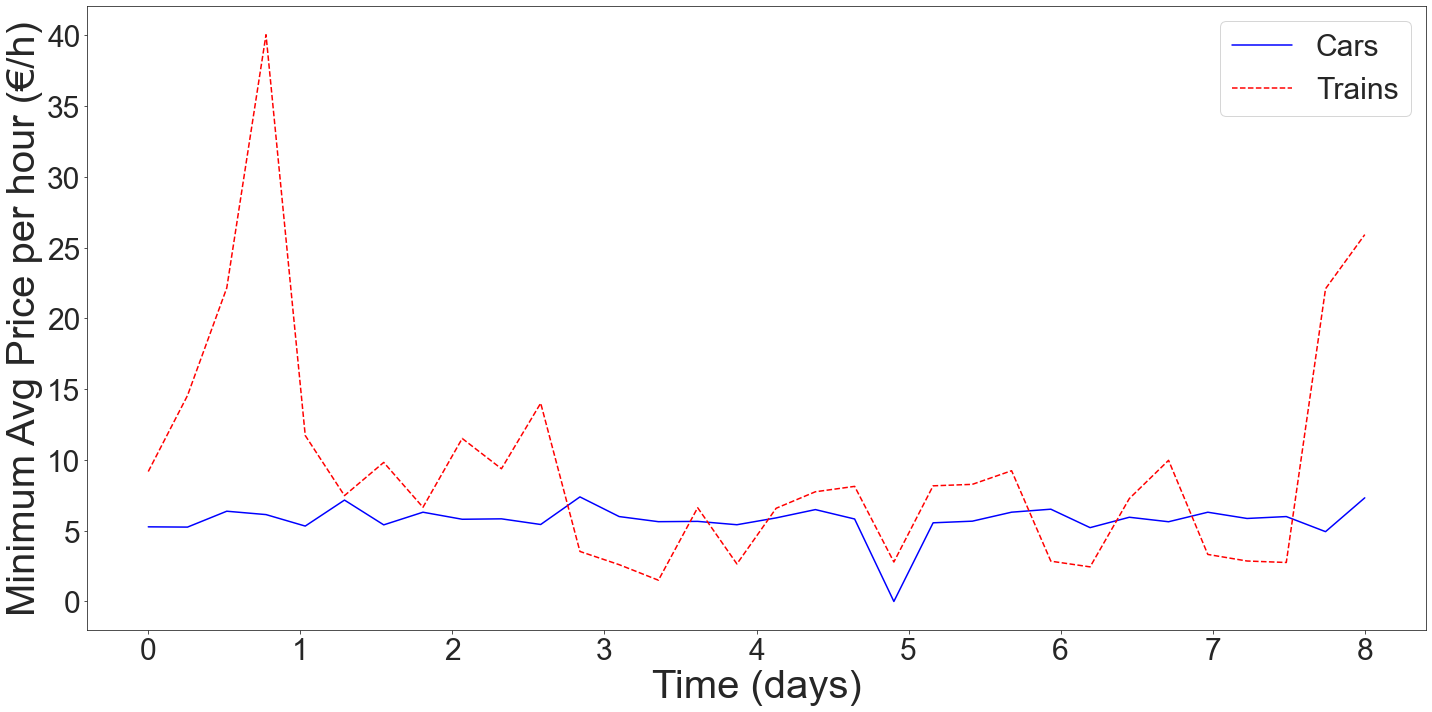

In [153]:
fig = plt.figure(figsize=(20,10))
X=np.linspace(0, 8, 32)
plt.plot(X, price_duration_c[0],'b-',label='Cars')
plt.plot(X, price_duration_t[0],'r--',label='Trains')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Time (days)",fontsize = 40)
plt.ylabel("Minimum Avg Price per hour (€/h)",fontsize = 40)
plt.legend(fontsize = 30)
# plt.title("Minimum Average Price of Cars/Trains over a week for Region 0 (Departure: Paris) ",fontsize = 20);
plt.tight_layout()
plt.savefig("avgprice0.png", dpi=150)

## Region 1

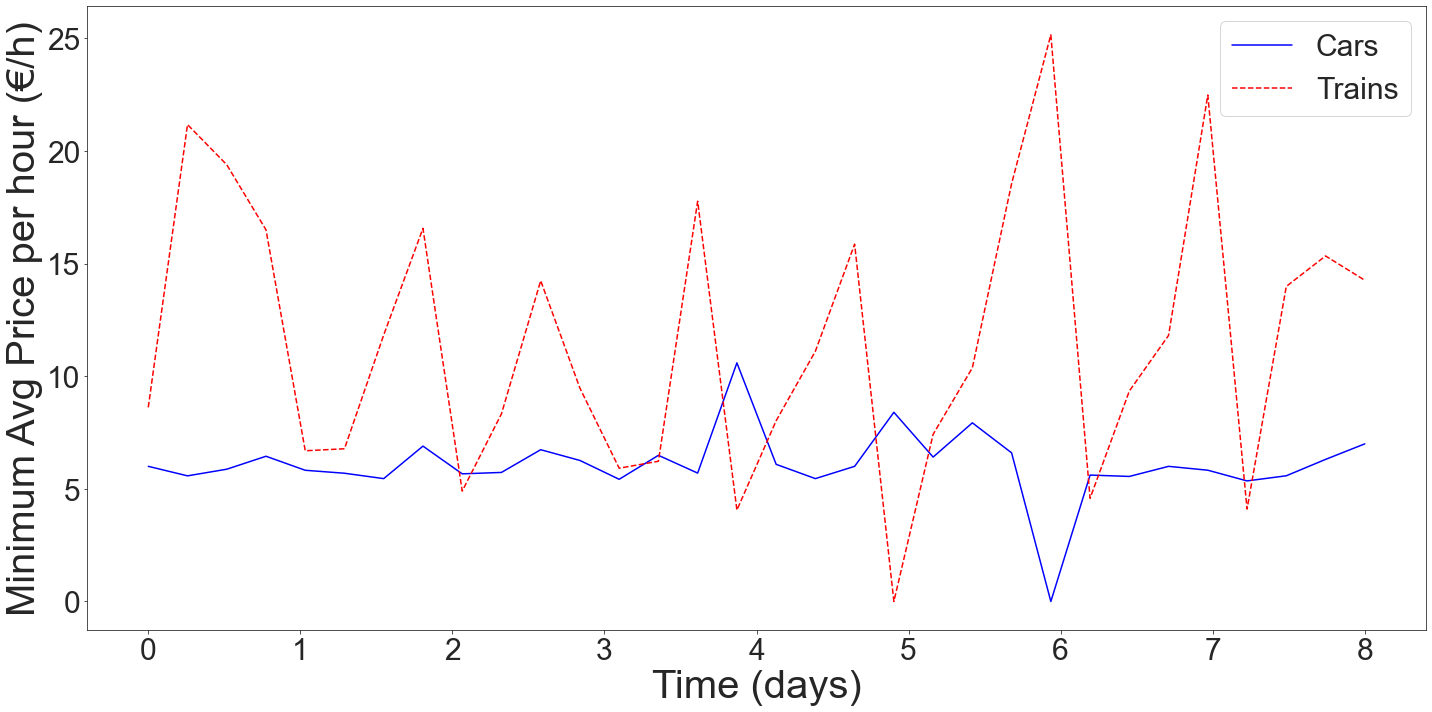

In [154]:
fig = plt.figure(figsize=(20,10))
X=np.linspace(0, 8, 32)
plt.plot(X, price_duration_c[1],'b-',label='Cars')
plt.plot(X, price_duration_t[1],'r--',label='Trains')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Time (days)",fontsize = 40)
plt.ylabel("Minimum Avg Price per hour (€/h)",fontsize = 40)
plt.legend(fontsize = 30)
# plt.title("Minimum Average Price of Cars/Trains over a week for Region 1 (Departure: Lyon) ",fontsize = 20);
plt.tight_layout()
plt.savefig("avgprice1.png", dpi=150)

## Region 2

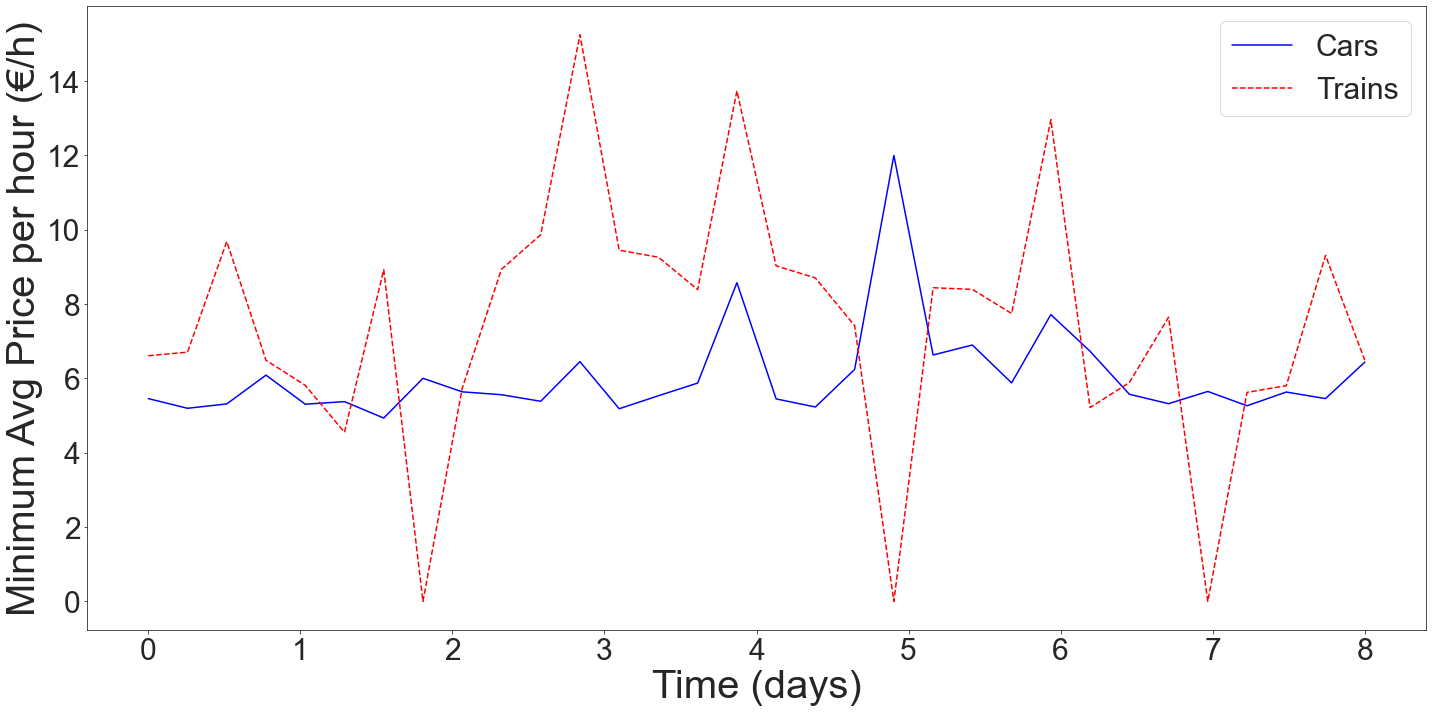

In [155]:
fig = plt.figure(figsize=(20,10))
X=np.linspace(0, 8, 32)
plt.plot(X, price_duration_c[2],'b-',label='Cars')
plt.plot(X, price_duration_t[2],'r--',label='Trains')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Time (days)",fontsize = 40)
plt.ylabel("Minimum Avg Price per hour (€/h)",fontsize = 40)
plt.legend(fontsize = 30)
# plt.title("Minimum Average Price of Cars/Trains over a week for Region 2 (Departure: Nantes) ",fontsize = 20);
plt.tight_layout()
plt.savefig("avgprice2.png", dpi=150)

## Region 4

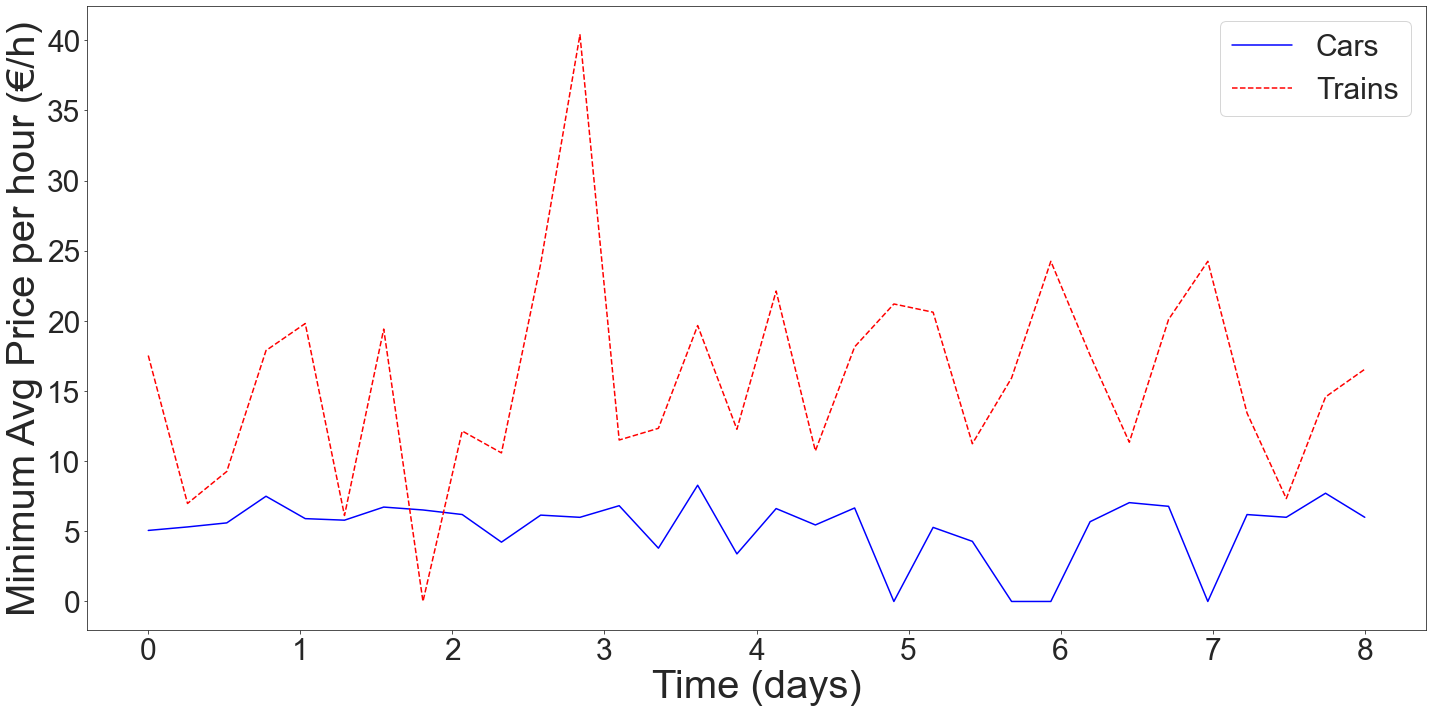

In [156]:
fig = plt.figure(figsize=(20,10))
X=np.linspace(0, 8, 32)
plt.plot(X, price_duration_c[3],'b-',label='Cars')
plt.plot(X, price_duration_t[3],'r--',label='Trains')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Time (days)",fontsize = 40)
plt.ylabel("Minimum Avg Price per hour (€/h)",fontsize = 40)
plt.legend(fontsize = 30)
# plt.title("Minimum Average Price of Cars/Trains over a week for Region 4 (Departure: Reims ) ",fontsize = 20);
plt.tight_layout()
plt.savefig("avgprice4.png", dpi=150)

In [111]:
# get the lowest price car per day and time slot between 2 cities
lowest_cars=pd.DataFrame()
cities=['Paris', 'Nantes', 'Lyon', 'Lille', 'Marseille', 'Reims',
       'Bordeaux', 'Toulouse', 'Montpellier', 'Nice', 'Brest',
       'Rennes', 'Poitiers', 'Nancy', 'Strasbourg', 'Metz']
for i in [1,2,3,4]:
        dt=data_blablacar
        dt1=dt[dt["dep_time_slot"]==i]
        for l in list(range(9)):
            date="2023-01-2"+str(l)
            dt2=dt1[dt1["dep_date"]==date]
            dt3=dt2[dt2["price"]==dt2["price"].min()]
            lowest_cars=lowest_cars.append(dt3)
lowest_cars=lowest_cars.drop_duplicates(subset=["dep_city","dep_time_slot","dep_date","arr_city"])
lowest_cars=lowest_cars.sort_values(["dep_date","dep_time_slot"])
lowest_cars=lowest_cars.reset_index()                
lowest_cars

index  region dep_city                                         dep_Adress  \
0    9171     4.0    Nancy        Imp. Printemps Automne, 54520 Laxou, France   
1    8384     2.0   Rennes                              Saint-Jacques - Gaîté   
2    9189     4.0    Nancy                                    Bd Lobau, Nancy   
3    9520     4.0     Metz  1 Rue du Corps Expéditionnaire Français, 57070...   
4    9535     4.0     Metz             6 Bd de la Défense, 57070 Metz, France   
..    ...     ...      ...                                                ...   
63   9682     4.0     Metz                                        Route d'Ars   
64   7950     2.0   Nantes  Parking P+R Le Cardo Orvault, A11 Sortie 37 Po...   
65   7957     2.0   Nantes                             Gare de Nantes, Nantes   
66   8774     2.0   Rennes                 Métro Villejean Université, Rennes   
67   9344     4.0    Nancy           4 Rue de la Moselle, 54520 Laxou, France   

   dep_CC   dep_date  dep_time  dep_time_slot  Distance_To_Dep arr_city  ...  \
0      FR 2023-01-20   7:40:00            1.0         3.421451     Metz  ...   
1      FR 2023-01-20  14:30:00            2.0         3.095040   Nantes  ...   
2      FR 2023-01-20  15:40:00            2.0         1.275999     Metz  ...   
3      FR 2023-01-20  13:00:00            2.0         0.906112    Nancy  ...   
4      FR 2023-01-20  16:30:00            3.0         3.057894    Nancy  ...   
..    ...        ...       ...            ...              ...      ...  ...   
63     FR 2023-01-28  10:40:00            1.0         5.075410    Nancy  ...   
64     FR 2023-01-28  12:00:00            2.0         5.857567   Rennes  ...   
65     FR 2023-01-28  18:50:00            3.0         0.767260   Rennes  ...   
66     FR 2023-01-28  16:00:00            3.0         1.999914   Nantes  ...   
67     FR 2023-01-28  20:30:00            4.0         3.761127     Metz  ...   

    arr_date  arr_time arr_time_slot Distance_From_Arrival  price  currency  \
0   20-01-23   8:30:00           1.0              3.057894    2.0       EUR   
1   20-01-23  15:50:00           2.0              3.239306    5.0       EUR   
2   20-01-23  16:30:00           3.0              3.902975    5.0       EUR   
3   20-01-23  13:50:00           2.0              5.770449    5.0       EUR   
4   20-01-23  17:30:00           3.0              3.421451    2.0       EUR   
..       ...       ...           ...                   ...    ...       ...   
63  28-01-23  11:20:00           1.0              3.770014    6.0       EUR   
64  28-01-23  13:00:00           2.0              8.422784    6.0       EUR   
65  28-01-23  20:10:00           4.0              2.770470    6.0       EUR   
66  28-01-23  17:10:00           3.0              5.484115    6.0       EUR   
67  28-01-23  21:20:00           4.0              3.531832    6.0       EUR   

    distance_in_meters duration  vehicle_make  vehicle_model  
0              60358.0   3000.0           NaN            NaN  
1             106224.0   4800.0       PEUGEOT        PARTNER  
2              59162.0   3000.0           NaN            NaN  
3              64928.0   3000.0       PEUGEOT            208  
4              70267.0   3600.0           NaN            NaN  
..                 ...      ...           ...            ...  
63             50686.0   2400.0          OPEL          CORSA  
64             92083.0   3600.0       PEUGEOT            208  
65            108940.0   4800.0       CITROEN             C3  
66            104930.0   4200.0    VOLKSWAGEN          CADDY  
67             58583.0   3000.0           NaN            NaN  

[68 rows x 22 columns]

In [113]:
# get the lowest price car per day and time slot between 2 cities
lowest_cars=pd.DataFrame()
cities=['Paris', 'Nantes', 'Lyon', 'Lille', 'Marseille', 'Reims',
       'Bordeaux', 'Toulouse', 'Montpellier', 'Nice', 'Brest',
       'Rennes', 'Poitiers', 'Nancy', 'Strasbourg', 'Metz']
main_cities=['Paris', 'Nantes', 'Lyon', 'Lille', 'Marseille', 'Reims',
       'Bordeaux', 'Toulouse', 'Montpellier', 'Nice', 'Brest',
       'Rennes', 'Poitiers', 'Nancy', 'Strasbourg', 'Metz']
for i in [1,2,3,4]:
    for j in main_cities:
        dt=data_blablacar
        dt1=dt[dt["dep_city"]==j]
        dt2=dt1[dt1["dep_time_slot"]==i]
        for k in cities:
            if(k!=j):
                dt3=dt2[dt2["arr_city"]==k]
                for l in list(range(9)):
                    date="2023-01-2"+str(l)
                    dt4=dt3[dt3["dep_date"]==date]
                    dt5=dt4[dt4["price"]==dt4["price"].min()]
                    lowest_cars=lowest_cars.append(dt5)
lowest_cars=lowest_cars.sort_values(["dep_date","dep_time_slot"])
lowest_cars=lowest_cars.drop_duplicates(subset=["dep_city","arr_city","dep_time_slot","dep_date"])
lowest_cars=lowest_cars.reset_index()                
lowest_cars

index  region dep_city                                 dep_Adress  \
0         8     0.0    Paris  14 Rue Jean Bleuzen, 92170 Vanves, France   
1       157     0.0    Paris           94380 Bonneuil-sur-Marne, France   
2       367     0.0    Paris    20 Rue de la Fossette, Le Mesnil-Amelot   
3       584     0.0    Paris                                 Orly Ville   
4       613     0.0    Paris                             Roissy-en-Brie   
...     ...     ...      ...                                        ...   
1733   8213     2.0    Brest                                      Brest   
1734   8322     2.0    Brest                  29400 Landivisiau, France   
1735   8778     2.0   Rennes           111 Rue de Lorient, 35000 Rennes   
1736   8917     2.0   Rennes             35160 Montfort-sur-Meu, France   
1737   9344     4.0    Nancy   4 Rue de la Moselle, 54520 Laxou, France   

     dep_CC   dep_date  dep_time  dep_time_slot  Distance_To_Dep   arr_city  \
0        FR 2023-01-20  10:00:00            1.0         5.956832     Nantes   
1        FR 2023-01-20  10:00:00            1.0        13.466642       Lyon   
2        FR 2023-01-20   5:00:00            1.0        24.617047      Lille   
3        FR 2023-01-20   9:30:00            1.0        13.287299  Marseille   
4        FR 2023-01-20   7:30:00            1.0        23.482999      Reims   
...     ...        ...       ...            ...              ...        ...   
1733     FR 2023-01-28  20:00:00            4.0         0.772067     Nantes   
1734     FR 2023-01-28   4:00:00            4.0        33.512498     Rennes   
1735     FR 2023-01-28  22:00:00            4.0         2.770470     Nantes   
1736     FR 2023-01-28  22:10:00            4.0        20.566582      Brest   
1737     FR 2023-01-28  20:30:00            4.0         3.761127       Metz   

      ...  arr_date  arr_time arr_time_slot Distance_From_Arrival  price  \
0     ...  20-01-23  13:50:00           2.0             44.128221   23.0   
1     ...  20-01-23  15:10:00           2.0             25.416274   23.0   
2     ...  20-01-23   7:00:00           1.0             33.426932   15.0   
3     ...  20-01-23  17:40:00           3.0              1.176483   39.0   
4     ...  20-01-23   9:00:00           1.0              3.582064    9.0   
...   ...       ...       ...           ...                   ...    ...   
1733  ...  28-01-23  23:30:00           4.0              4.127680   18.0   
1734  ...  28-01-23   6:40:00           1.0              2.118298   13.0   
1735  ...  28-01-23  23:20:00           4.0              7.863274    8.0   
1736  ...  29-01-23   0:50:00           4.0              3.708291   18.0   
1737  ...  28-01-23  21:20:00           4.0              3.531832    6.0   

      currency  distance_in_meters duration  vehicle_make  vehicle_model  
0          EUR            370500.0  13800.0           NaN            NaN  
1          EUR            499117.0  18600.0          FORD           KUGA  
2          EUR            190987.0   7200.0       RENAULT       CLIO III  
3          EUR            761043.0  29400.0        NISSAN        QASHQAI  
4          EUR            125986.0   5400.0           NaN            NaN  
...        ...                 ...      ...           ...            ...  
1733       EUR            309001.0  12600.0       PEUGEOT            208  
1734       EUR            203508.0   9600.0           BMW       1 SERIES  
1735       EUR            117958.0   4800.0       CITROEN             C4  
1736       EUR            234107.0   9600.0       PEUGEOT           5008  
1737       EUR             58583.0   3000.0           NaN            NaN  

[1738 rows x 22 columns]

In [116]:
# get the lowest price train per day and time slot between 2 cities
lowest_trains=pd.DataFrame()
cities=['Paris', 'Nantes', 'Lyon', 'Lille', 'Marseille', 'Reims',
       'Bordeaux', 'Toulouse', 'Montpellier', 'Nice', 'Brest',
       'Rennes', 'Poitiers', 'Nancy', 'Strasbourg', 'Metz']
main_cities=['Paris', 'Nantes', 'Lyon', 'Lille', 'Marseille', 'Reims',
       'Bordeaux', 'Toulouse', 'Montpellier', 'Nice', 'Brest',
       'Rennes', 'Poitiers', 'Nancy', 'Strasbourg', 'Metz']
for i in [1,2,3,4]:
    for j in main_cities:
        dt=data_trains
        dt1=dt[dt["dep_city"]==j]
        dt2=dt1[dt1["dep_time_slot"]==i]
        for k in cities:
            if(k!=j):
                dt3=dt2[dt2["arr_city"]==k]
                for l in list(range(9)):
                    date="2023-01-2"+str(l)
                    dt4=dt3[dt3["dep_date"]==date]
                    dt5=dt4[dt4["standard_class_price"]==dt4["standard_class_price"].min()]
                    lowest_trains=lowest_trains.append(dt5)
lowest_trains=lowest_trains.sort_values(["dep_date","dep_time_slot"])
lowest_trains=lowest_trains.drop_duplicates(subset=["dep_city","arr_city","dep_time_slot","dep_date"])                    
lowest_trains=lowest_trains.reset_index()                
lowest_trains.to_csv('lowest_trains.csv')

In [128]:
lowest_cars.describe().iloc[:,[3,5,6,8]]

Distance_To_Dep  Distance_From_Arrival        price      duration
count      1738.000000            1738.000000  1738.000000   1738.000000
mean         10.936253              10.440828    21.849252  12923.475259
std          12.586781              12.407307    13.422982   6949.855025
min           0.044086               0.062967     2.000000   2400.000000
25%           2.760061               2.368729    13.000000   7200.000000
50%           4.557269               4.491167    18.000000  11400.000000
75%          18.461612              15.916081    29.000000  17400.000000
max          49.867855              49.513149   107.000000  47400.000000

In [130]:
lowest_trains.describe().iloc[:,[4,6]]

duration  standard_class_price
count    2341.000000           2341.000000
mean    18653.746262             43.737783
std     15761.161055             30.034398
min      2400.000000              5.000000
25%      8220.000000             25.490000
50%     15900.000000             35.000000
75%     24480.000000             52.290000
max    165600.000000            237.800000